# Part 1: WeatherPy
In this deliverable, you'll create a Python script to visualize the weather of over 500 cities of varying distances from the equator. You'll use the citipy Python libraryLinks to an external site., the OpenWeatherMap APILinks to an external site., and your problem-solving skills to create a representative model of weather across cities.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# pip install citipy

In [2]:
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

To fulfill the first requirement, you'll use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code. Next, you'll create a series of scatter plots to showcase the following relationships:

* Latitude vs. Temperature
* Latitude vs. Humidity
* Latitude vs. Cloudiness
* Latitude vs. Wind Speed

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 461


In [4]:
# API queries now
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
clouds = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query

# Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()

    # Group cities in sets of 100 for logging purposes
    if (i % 100 == 0 and i >= 100):
        set_count += 1
        record_count = 0
        
    # Append the City information
    try:
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        
        # Log the url, record, and set numbers
        print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        
        record_count+=1
        
    except (KeyError):
        print("City not found. skipping.")
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City not found. skipping.
Processing Record 1 of Set 1 | raudeberg
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | sringeri
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | kenitra
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | batemans bay
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | barillas
Processing Record 16 of Set 1 | jiayuguan
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | port hardy
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | agadir
Processing Record 22 of Set 1 | urman
Processing Record 23 of Set 1 | erzin
Processing Record 24 of Set 1 | busselton
City not found

Processing Record 4 of Set 3 | samarai
Processing Record 5 of Set 3 | nanning
City not found. skipping.
Processing Record 6 of Set 3 | puerto madryn
City not found. skipping.
Processing Record 7 of Set 3 | lamu
Processing Record 8 of Set 3 | malim
Processing Record 9 of Set 3 | esperance
Processing Record 10 of Set 3 | nanortalik
Processing Record 11 of Set 3 | peabiru
Processing Record 12 of Set 3 | rocha
Processing Record 13 of Set 3 | comodoro rivadavia
Processing Record 14 of Set 3 | hay river
Processing Record 15 of Set 3 | mandalgovi
Processing Record 16 of Set 3 | lorengau
City not found. skipping.
Processing Record 17 of Set 3 | vila franca do campo
Processing Record 18 of Set 3 | aykhal
Processing Record 19 of Set 3 | kenai
Processing Record 20 of Set 3 | taltal
Processing Record 21 of Set 3 | ponta delgada
Processing Record 22 of Set 3 | tanout
Processing Record 23 of Set 3 | hamilton
Processing Record 24 of Set 3 | victoria
Processing Record 25 of Set 3 | voh
Processing Reco

Processing Record 8 of Set 5 | snasa
City not found. skipping.
Processing Record 9 of Set 5 | romny
Processing Record 10 of Set 5 | yerbogachen
Processing Record 11 of Set 5 | evensk
City not found. skipping.
Processing Record 12 of Set 5 | bonito
Processing Record 13 of Set 5 | johi
City not found. skipping.
Processing Record 14 of Set 5 | cherepanovo
Processing Record 15 of Set 5 | quatre cocos
Processing Record 16 of Set 5 | cozumel
Processing Record 17 of Set 5 | belyy yar
Processing Record 18 of Set 5 | aden
Processing Record 19 of Set 5 | ferkessedougou
Processing Record 20 of Set 5 | manta
City not found. skipping.
Processing Record 21 of Set 5 | mount gambier
Processing Record 22 of Set 5 | arlit
Processing Record 23 of Set 5 | bonavista
City not found. skipping.
Processing Record 24 of Set 5 | broome
Processing Record 25 of Set 5 | batagay-alyta
Processing Record 26 of Set 5 | kupang
Processing Record 27 of Set 5 | le vauclin
Processing Record 28 of Set 5 | stykkisholmur
Proce

In [5]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":clouds, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

city_df.count()

City          422
Cloudiness    422
Country       422
Date          422
Humidity      422
Lat           422
Lng           422
Max Temp      422
Wind Speed    422
dtype: int64

In [6]:
# Display sample data
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Raudeberg,34,NO,1680383681,76,61.9875,5.1352,34.47,2.46
1,Rikitea,34,PF,1680383454,81,-23.1203,-134.9692,80.19,15.95
2,Lebu,99,CL,1680383682,83,-37.6167,-73.6500,61.27,9.91
3,Chui,15,UY,1680383682,61,-33.6971,-53.4616,65.53,8.39
4,Sringeri,18,IN,1680383682,94,13.4167,75.2500,63.81,1.72


In [7]:
city_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
417,Tromsø,75,NO,1680383794,74,69.6496,18.9570,26.62,4.61
418,Natal,20,BR,1680383615,78,-5.7950,-35.2094,81.25,6.91
419,Watsa,100,CD,1680383795,76,3.0372,29.5355,67.84,3.15
420,Aquin,1,HT,1680383795,56,18.2833,-73.4000,81.95,6.11
421,Bentiu,100,SS,1680383795,11,9.2333,29.8333,83.41,1.99


In [8]:
# Export the City_Data into a csv
city_df.to_csv("output_data/cities.csv", index_label="City_ID")

# Read saved data
city_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Raudeberg,34,NO,1680383681,76,61.9875,5.1352,34.47,2.46
1,Rikitea,34,PF,1680383454,81,-23.1203,-134.9692,80.19,15.95
2,Lebu,99,CL,1680383682,83,-37.6167,-73.6500,61.27,9.91
3,Chui,15,UY,1680383682,61,-33.6971,-53.4616,65.53,8.39
4,Sringeri,18,IN,1680383682,94,13.4167,75.2500,63.81,1.72


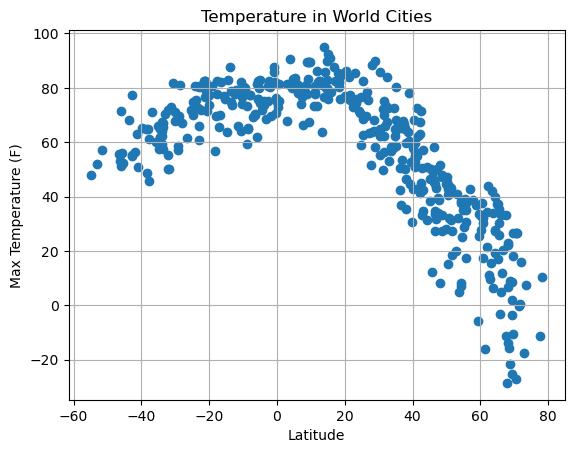

In [11]:
# Latitude vs. Temperature
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

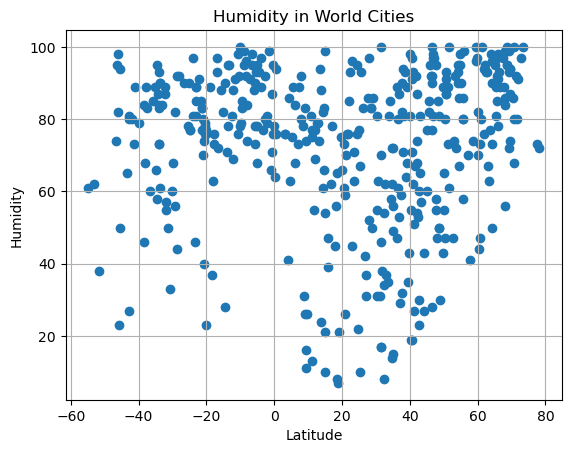

In [12]:
# Latitude vs. Humidity
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

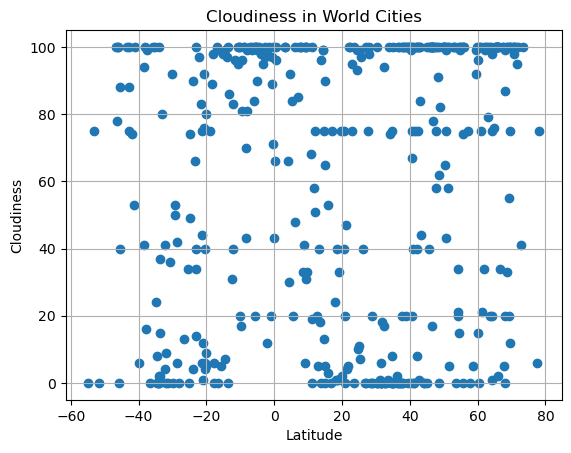

In [13]:
# Latitude vs. Cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

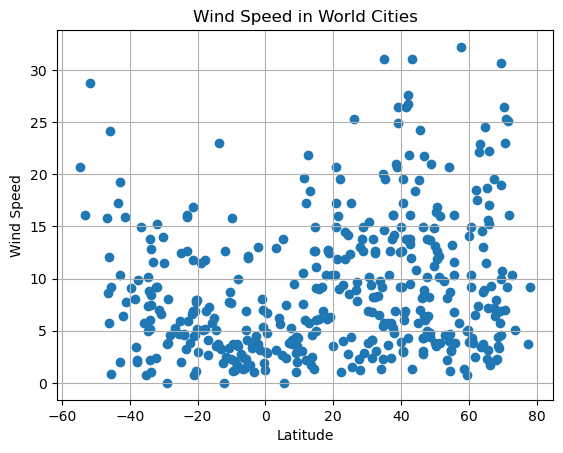

In [14]:
# Latitude vs. Wind Speed
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

### Requirement 2: Compute Linear Regression for Each Relationship
To fulfill the second requirement, compute the linear regression for each relationship. Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude). You may find it helpful to define a function in order to create the linear regression plots.

Next, create a series of scatter plots. Be sure to include the linear regression line, the model's formula, and the r values as you can see in the following image

In [15]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

#### Hemisphere: Temp x Lat

The r-squared is: -0.8813865249493993


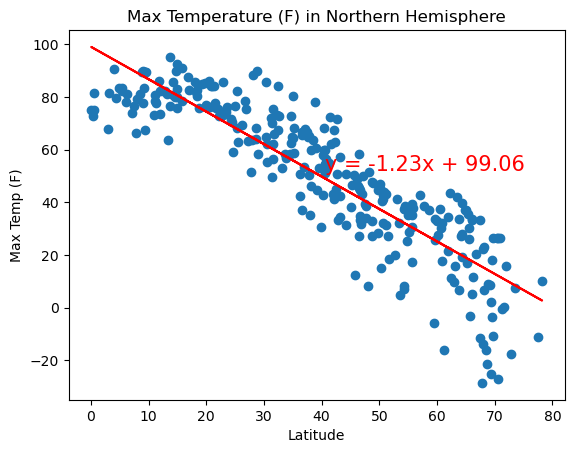

None


In [16]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Max Temperature (F) in Northern Hemisphere")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.6629701066882341


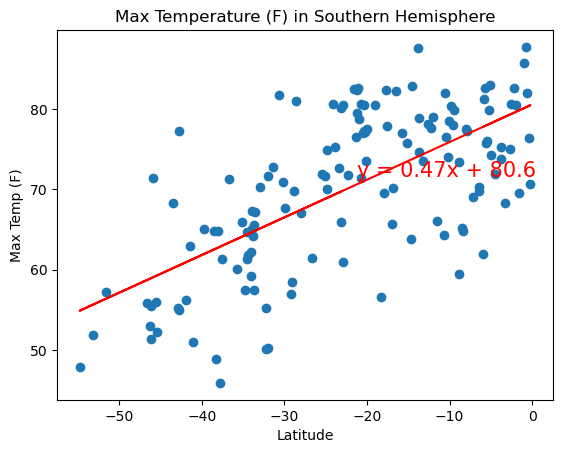

None


In [17]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Max Temperature (F) in Southern Hemisphere")
print(linear_reg_plot(x_values,y_values))

#### Hemisphere: Humidity x Lat

The r-squared is: 0.34576091774113227


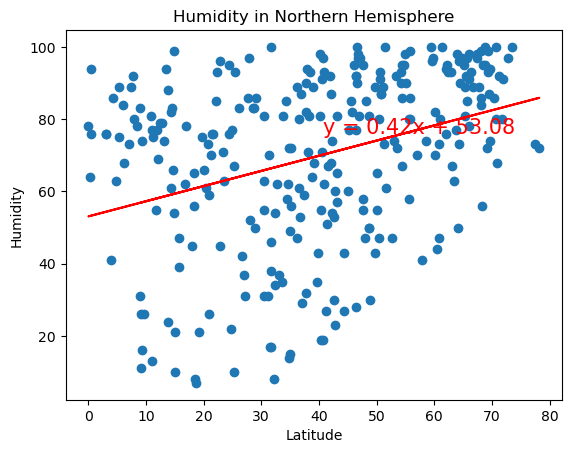

None


In [18]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity")
plt.title("Humidity in Northern Hemisphere")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.6629701066882341


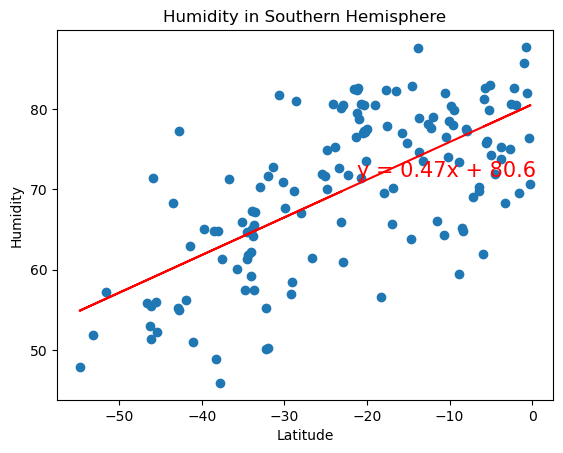

None


In [19]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Humidity")
plt.title("Humidity in Southern Hemisphere")
print(linear_reg_plot(x_values,y_values))

#### Hemisphere: Cloudiness x Lat

The r-squared is: 0.20820631691431202


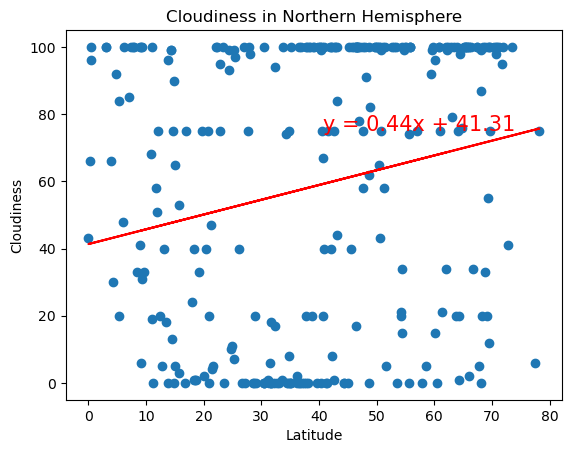

None


In [20]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title("Cloudiness in Northern Hemisphere")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.29832909104574123


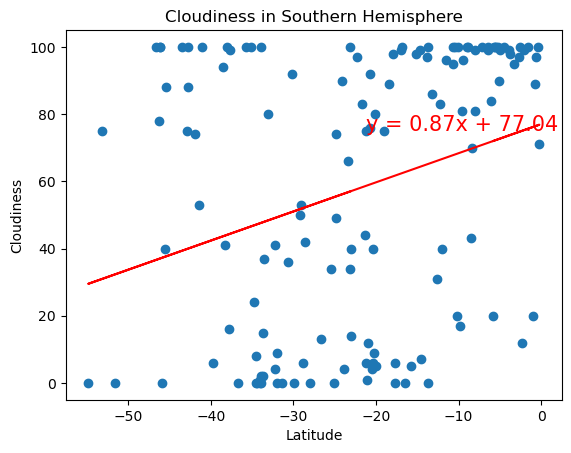

None


In [21]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title("Cloudiness in Southern Hemisphere")
print(linear_reg_plot(x_values,y_values))

#### Hemisphere: Wind Speed x Lat

The r-squared is: 0.1631094090386076


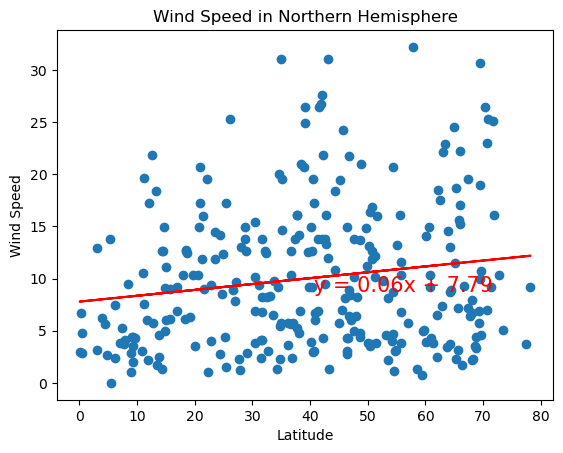

None


In [22]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title("Wind Speed in Northern Hemisphere")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.420709435339786


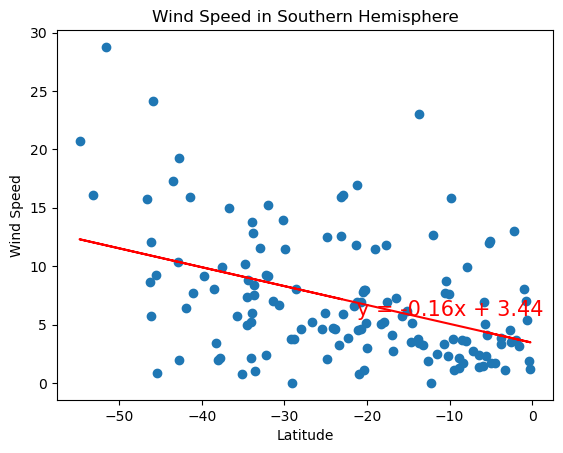

None


In [23]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title("Wind Speed in Southern Hemisphere")
print(linear_reg_plot(x_values,y_values))